Problem Statement: To predict the presence of amphibians species near the water reservoirs based on features obtained from GIS systems 

In [ ]:
pip install keras-tuner

     |████████████████████████████████| 71kB 4.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=186887f7f6b4ec93386e3d68d1306f0ceb46dbfdcd4acd1c0c87888fe8b760dc
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=8ca818b91e44cf8a6bc45434bd05cdd4d1d9ac449796992b126eaf93063398ec
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  
import seaborn as sns            
%matplotlib inline
sns.set() 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/

/content/drive


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
cd 'Colab Notebooks'/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
df = pd.read_csv('dataset.csv',sep = None, engine = 'python', index_col=0,header=1)

In [ ]:
df.head(2)

,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
ID,,,,,,,,,,,,,,,,,,,,,,
1,A1,600,1,1,4,6,2,10,0,0,50,0,0,0,1,0,0,0,0,0,0,0
2,A1,700,1,5,1,10,6,10,3,1,75,1,1,0,1,0,1,1,0,0,1,0


In [ ]:
df.tail(5)

,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
ID,,,,,,,,,,,,,,,,,,,,,,
185,S52,2300,1,12,3,2,2,1,0,0,75,2,1,0,1,0,1,0,0,0,0,0
186,S52,300,1,14,2,7,10,2,0,0,100,5,5,0,1,1,1,1,1,0,1,0
187,S52,500,1,1,4,1,10,2,0,0,100,5,5,0,1,1,1,1,1,0,1,0
188,S52,300,1,12,3,2,1,6,0,0,100,1,0,0,1,0,1,1,0,0,0,0
189,S52,300,1,12,3,2,6,10,0,0,100,1,1,0,1,0,1,1,0,0,0,0


In [ ]:
df.shape

(189, 22)

In [ ]:
df.info

<bound method DataFrame.info of     Motorway    SR  NR  ...  Tree frog  Common newt  Great crested newt
ID                      ...                                            
1         A1   600   1  ...          0            0                   0
2         A1   700   1  ...          0            1                   0
3         A1   200   1  ...          0            1                   0
4         A1   300   1  ...          0            0                   0
5         A1   600   2  ...          0            1                   1
..       ...   ...  ..  ...        ...          ...                 ...
185      S52  2300   1  ...          0            0                   0
186      S52   300   1  ...          0            1                   0
187      S52   500   1  ...          0            1                   0
188      S52   300   1  ...          0            0                   0
189      S52   300   1  ...          0            0                   0

[189 rows x 22 columns]>

In [ ]:
cols = df.columns.tolist()
cols

['Motorway',
 'SR',
 'NR',
 'TR',
 'VR',
 'SUR1',
 'SUR2',
 'SUR3',
 'UR',
 'FR',
 'OR',
 'RR',
 'BR',
 'MR',
 'CR',
 'Green frogs',
 'Brown frogs',
 'Common toad',
 'Fire-bellied toad',
 'Tree frog',
 'Common newt',
 'Great crested newt']

In [ ]:
df['Green frogs'].value_counts()

1    108
0     81
Name: Green frogs, dtype: int64

In [ ]:
df['Brown frogs'].value_counts()

1    148
0     41
Name: Brown frogs, dtype: int64

In [ ]:
df['Common toad'].value_counts()

1    124
0     65
Name: Common toad, dtype: int64

In [ ]:
df['Fire-bellied toad'].value_counts()

0    131
1     58
Name: Fire-bellied toad, dtype: int64

In [ ]:
df['Tree frog'].value_counts()

0    118
1     71
Name: Tree frog, dtype: int64

In [ ]:
df['Great crested newt'].value_counts()

0    168
1     21
Name: Great crested newt, dtype: int64

In [ ]:
df.SR.unique()

array([   600,    700,    200,    300,    500,    750,   7000,   1700,
         8000,  30000,   1600,   3800,   2500,    800,   4500,   1000,
         3300,   2100,    400,   1100,    100,  80000,  31000,  25000,
        40000,   1900,     30,   4300,   4000,   1500,  28300,     50,
         9000,  19300,   3500,   9100,   1300,   2000,  10050,  16000,
         5000,  10000,  29000,   8250,    250, 500000,  50000,    450,
         8300,   1800,    150,    900,   3000,    350,   6300,   3400,
         2400, 115000, 360000,   4100,   2300,  15000,   2600,  26000,
         1400,  22000])

In [ ]:
df.TR.unique()

array([ 1,  5, 12, 14, 15, 11,  2,  7])

In [ ]:
df.VR.unique()

array([4, 1, 0, 2, 3])

In [ ]:
df.Motorway.unique()

array(['A1', 'S52'], dtype=object)

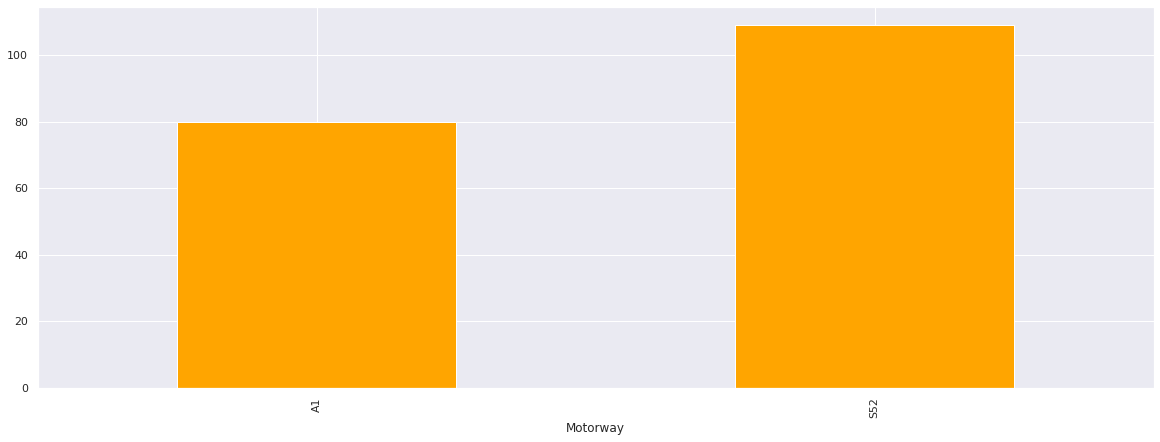

In [ ]:
df.groupby(['Motorway'])['SR'].count().plot(kind='bar', figsize=(20, 7), color='orange')

In [ ]:
df_new = df[['Motorway','Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']]
df_new

,Motorway,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
ID,,,,,,,,
1,A1,0,0,0,0,0,0,0
2,A1,0,1,1,0,0,1,0
3,A1,0,1,1,0,0,1,0
4,A1,0,0,1,0,0,0,0
5,A1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
185,S52,0,1,0,0,0,0,0
186,S52,1,1,1,1,0,1,0
187,S52,1,1,1,1,0,1,0


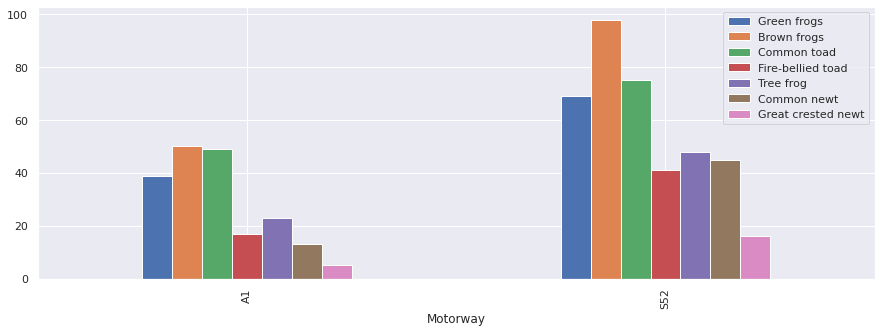

In [ ]:
df_new.groupby('Motorway').sum().plot(kind='bar',figsize=(15,5))

**S52 Motorway has richer population of amphibians than A1 Motorway**

In [ ]:
df_SR = df[['SR','Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']]
df_SR

,SR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
ID,,,,,,,,
1,600,0,0,0,0,0,0,0
2,700,0,1,1,0,0,1,0
3,200,0,1,1,0,0,1,0
4,300,0,0,1,0,0,0,0
5,600,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
185,2300,0,1,0,0,0,0,0
186,300,1,1,1,1,0,1,0
187,500,1,1,1,1,0,1,0


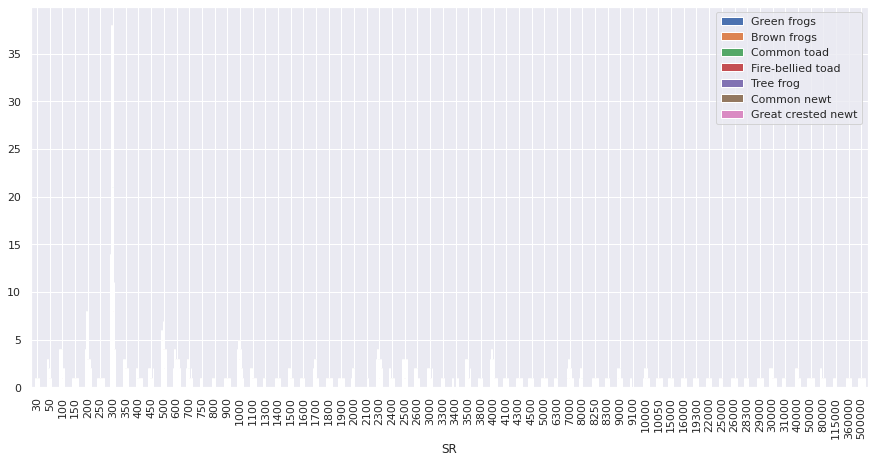

In [ ]:
df_SR.groupby('SR').sum().plot(kind='bar',figsize=(15,7))

Text(0.5, 1.0, 'Bar Chart showing the Frequency of SR for each SR value')

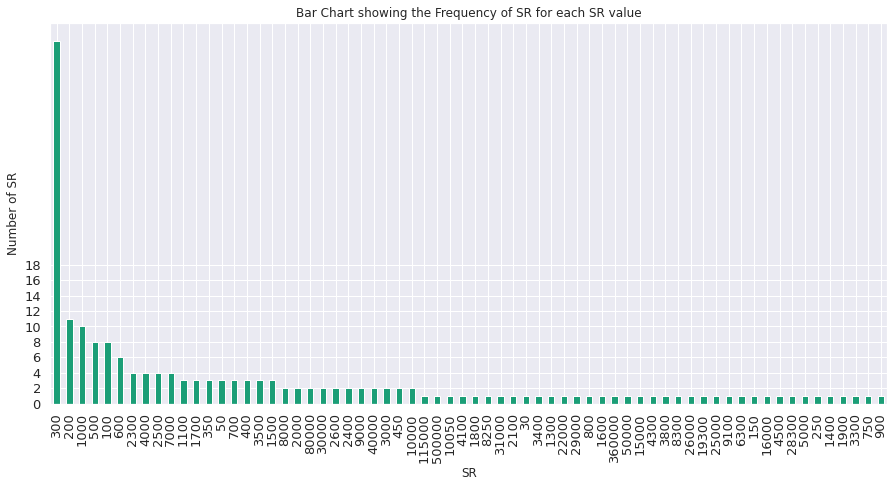

In [ ]:
df_SR['SR'].value_counts().plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13, yticks=np.arange(0, 19, 2))

# Using matplotlib to add labels and title to the plot. 
# Pandas and matplotlib are linked with each other in the notebook by the use of this line in the Imports: %matplotlib inline

plt.xlabel('SR')
plt.ylabel('Number of SR')
plt.title('Bar Chart showing the Frequency of SR for each SR value') 

SR value 300 has repeated most of the times ie. SR 300 has more amphibians 

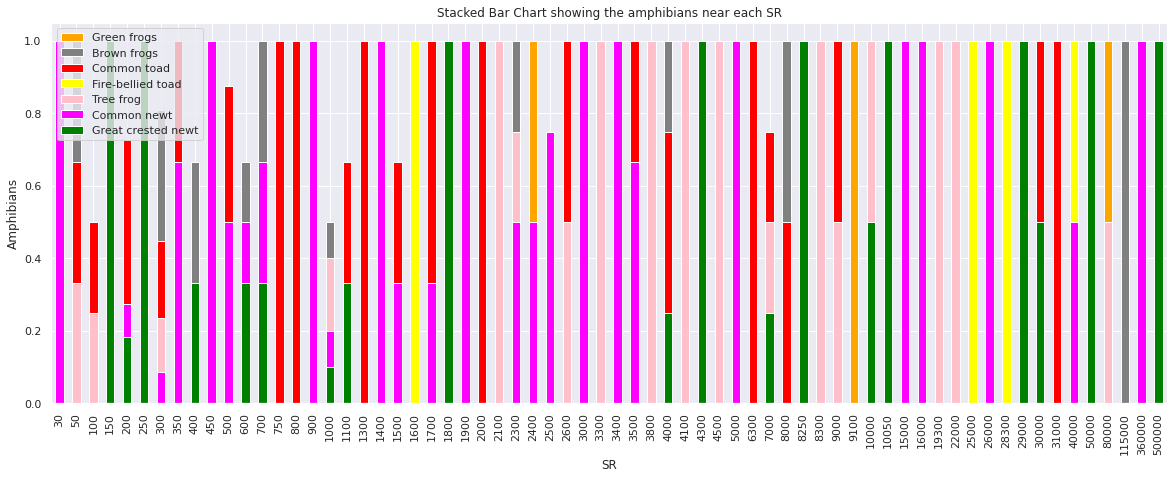

In [ ]:
df_SR.groupby(['SR'])['Green frogs'].mean().plot(kind='bar', figsize=(20, 7), color='orange')
df_SR.groupby(['SR'])['Brown frogs'].mean().plot(kind='bar', figsize=(20, 7), color='grey')
df_SR.groupby(['SR'])['Common toad'].mean().plot(kind='bar', figsize=(20, 7), color='red')
df_SR.groupby(['SR'])['Fire-bellied toad'].mean().plot(kind='bar', figsize=(20, 7), color='yellow')
df_SR.groupby(['SR'])['Tree frog'].mean().plot(kind='bar', figsize=(20, 7), color='pink')
df_SR.groupby(['SR'])['Common newt'].mean().plot(kind='bar', figsize=(20, 7), color='magenta')
df_SR.groupby(['SR'])['Great crested newt'].mean().plot(kind='bar', figsize=(20, 7), color='green')
                      
plt.xlabel('SR')
plt.ylabel('Amphibians')
plt.title('Stacked Bar Chart showing the amphibians near each SR')
plt.legend(labels=('Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt'))

This is distrbution of amphibians according to Surface area. We can see that there are some surface areas where only one type of amphibian population is seen. There are other factors also which influence their population

In [ ]:
df_TR = df[['TR','Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']]
df_TR

,TR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
ID,,,,,,,,
1,1,0,0,0,0,0,0,0
2,5,0,1,1,0,0,1,0
3,5,0,1,1,0,0,1,0
4,5,0,0,1,0,0,0,0
5,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
185,12,0,1,0,0,0,0,0
186,14,1,1,1,1,0,1,0
187,1,1,1,1,1,0,1,0


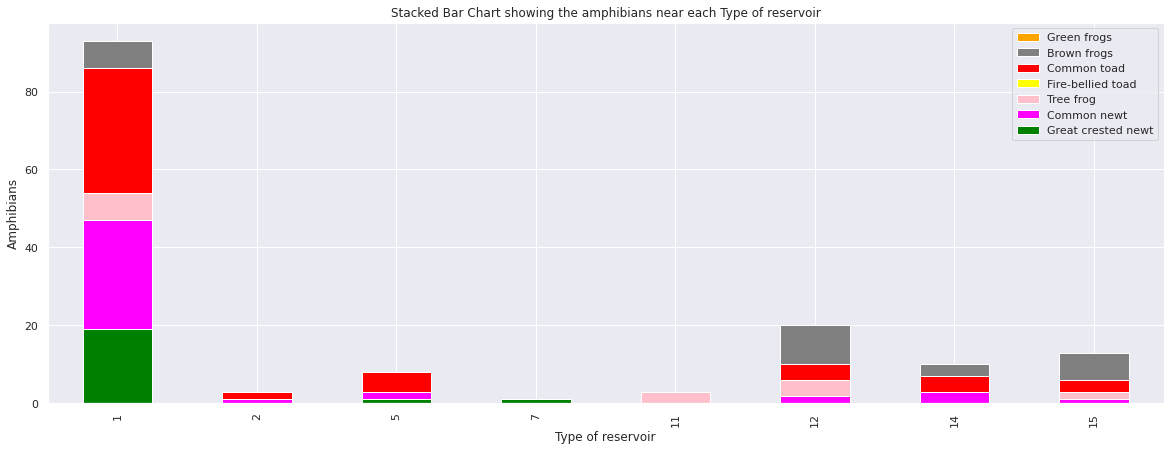

In [ ]:
df_TR.groupby(['TR'])['Green frogs'].sum().plot(kind='bar', figsize=(20, 7), color='orange')
df_TR.groupby(['TR'])['Brown frogs'].sum().plot(kind='bar', figsize=(20, 7), color='grey')
df_TR.groupby(['TR'])['Common toad'].sum().plot(kind='bar', figsize=(20, 7), color='red')
df_TR.groupby(['TR'])['Fire-bellied toad'].sum().plot(kind='bar', figsize=(20, 7), color='yellow')
df_TR.groupby(['TR'])['Tree frog'].sum().plot(kind='bar', figsize=(20, 7), color='pink')
df_TR.groupby(['TR'])['Common newt'].sum().plot(kind='bar', figsize=(20, 7), color='magenta')
df_TR.groupby(['TR'])['Great crested newt'].sum().plot(kind='bar', figsize=(20, 7), color='green')
                      
plt.xlabel('Type of reservoir')
plt.ylabel('Amphibians')
plt.title('Stacked Bar Chart showing the amphibians near each Type of reservoir')
plt.legend(labels=('Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt'))

How type of reservoir is influencing the type of amphibian found near it can be understood from this plot. Type 7 and Type 11 are the only reservoirs where only one type of amphibian is found Great crested newt and Tree frog respectively. Common toad is found almost everywhere except 7 and 11 types.
As Green frogs and Fire-bellied frogs are not seen here their population must be very small compared to the others So let's have a separate plot showing distribution of these two types of frogs according to TR

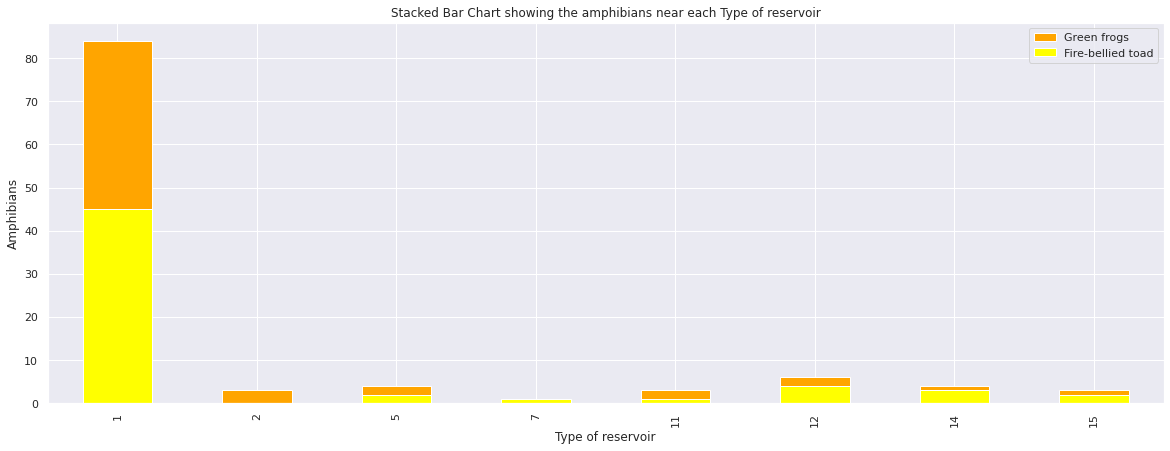

In [112]:
df_TR.groupby(['TR'])['Green frogs'].sum().plot(kind='bar', figsize=(20, 7), color='orange')
df_TR.groupby(['TR'])['Fire-bellied toad'].sum().plot(kind='bar', figsize=(20, 7), color='yellow')

plt.xlabel('Type of reservoir')
plt.ylabel('Amphibians')
plt.title('Stacked Bar Chart showing the amphibians near each Type of reservoir')
plt.legend(labels=('Green frogs','Fire-bellied toad'))

In [ ]:
df_TR1 = df_TR[df_TR['TR']==1]

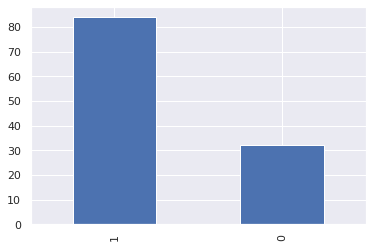

In [ ]:
df_TR1['Green frogs'].value_counts().plot(kind='bar')

In [110]:
df_TR1[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs           84
Brown frogs           93
Common toad           86
Fire-bellied toad     45
Tree frog             54
Common newt           47
Great crested newt    19
dtype: int64

In [109]:
df_TR2 = df_TR[df_TR['TR']==2]
df_TR2[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs           3
Brown frogs           2
Common toad           3
Fire-bellied toad     0
Tree frog             0
Common newt           1
Great crested newt    0
dtype: int64

In [ ]:
df_TR5 = df_TR[df_TR['TR']== 5]
df_TR5[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs           4
Brown frogs           6
Common toad           8
Fire-bellied toad     2
Tree frog             2
Common newt           3
Great crested newt    1
dtype: int64

In [ ]:
df_TR5 = df_TR[df_TR['TR']== 5]
df_TR5[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs           4
Brown frogs           6
Common toad           8
Fire-bellied toad     2
Tree frog             2
Common newt           3
Great crested newt    1
dtype: int64

In [ ]:
df_TR7 = df_TR[df_TR['TR']== 7]
df_TR7[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs           1
Brown frogs           1
Common toad           1
Fire-bellied toad     1
Tree frog             1
Common newt           1
Great crested newt    1
dtype: int64

In [ ]:
df_TR11 = df_TR[df_TR['TR']== 11]
df_TR11[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs           3
Brown frogs           3
Common toad           3
Fire-bellied toad     1
Tree frog             3
Common newt           0
Great crested newt    0
dtype: int64

In [ ]:
df_TR12 = df_TR[df_TR['TR']== 12]
df_TR12[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs            6
Brown frogs           20
Common toad           10
Fire-bellied toad      4
Tree frog              6
Common newt            2
Great crested newt     0
dtype: int64

In [ ]:
df_TR14 = df_TR[df_TR['TR']== 14]
df_TR14[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs            4
Brown frogs           10
Common toad            7
Fire-bellied toad      3
Tree frog              2
Common newt            3
Great crested newt     0
dtype: int64

In [ ]:
df_TR15 = df_TR[df_TR['TR']== 15]
df_TR15[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs            3
Brown frogs           13
Common toad            6
Fire-bellied toad      2
Tree frog              3
Common newt            1
Great crested newt     0
dtype: int64

Reservoir 1 is most favorable for the amphibians while Reservoir 7 is the least favourable 

In [ ]:
df_VR = df[['VR','Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']]
df_VR.head(2)

,VR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
ID,,,,,,,,
1,4,0,0,0,0,0,0,0
2,1,0,1,1,0,0,1,0


In [ ]:
df_VR0 = df_VR[df_VR['VR']==0]
df_VR0[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs           21
Brown frogs           18
Common toad           19
Fire-bellied toad      5
Tree frog              5
Common newt            5
Great crested newt     2
dtype: int64

In [ ]:
df_VR1 = df_VR[df_VR['VR']==1]
df_VR1[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs           29
Brown frogs           45
Common toad           38
Fire-bellied toad     21
Tree frog             23
Common newt           20
Great crested newt     7
dtype: int64

In [ ]:
df_VR2 = df_VR[df_VR['VR']==2]
df_VR2[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs           21
Brown frogs           29
Common toad           22
Fire-bellied toad     10
Tree frog             11
Common newt           13
Great crested newt     2
dtype: int64

In [ ]:
df_VR3 = df_VR[df_VR['VR']==3]
df_VR3[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs           25
Brown frogs           37
Common toad           30
Fire-bellied toad     13
Tree frog             20
Common newt           14
Great crested newt     7
dtype: int64

In [ ]:
df_VR4 = df_VR[df_VR['VR']==4]
df_VR4[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']].eq(1).sum()

Green frogs           12
Brown frogs           19
Common toad           15
Fire-bellied toad      9
Tree frog             12
Common newt            6
Great crested newt     3
dtype: int64

Except for VR0 all are densely populated. Good vegetation favours the habitat of amphibians

In [ ]:
df.OR.unique()

array([ 50,  75,  25,  99, 100,  80])

In [ ]:
df['OR'].replace(25, 0,inplace=True)
df['OR'].replace(50, 1,inplace=True)
df['OR'].replace(75, 2,inplace=True)
df['OR'].replace(80, 3,inplace=True)
df['OR'].replace(99, 4,inplace=True)
df['OR'].replace(100, 5,inplace=True)

In [ ]:
df['Motorway'].replace('A1', 0,inplace=True)
df['Motorway'].replace('S52', 1,inplace=True)

In [ ]:
dfn = df.drop(['Motorway'],axis=1)

In [ ]:
X = dfn.iloc[:,1:14]
y = dfn.iloc[:,14:]

In [ ]:
X.head(2)

,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
ID,,,,,,,,,,,,,
1,1,1,4,6,2,10,0,0,1,0,0,0,1
2,1,5,1,10,6,10,3,1,2,1,1,0,1


In [ ]:
y.head(2)

,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
ID,,,,,,,
1,0,0,0,0,0,0,0
2,0,1,1,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.3, random_state = 1)
print('Train cases as below')
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
x_train shape:  (132, 13)
y_train shape:  (132, 7)

Test cases as below
x_test shape:  (57, 13)
y_test shape:  (57, 7)


In [ ]:
import requests
import re
import seaborn

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

1) A simple model with 2 HL

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(500, input_dim=13, activation='relu'))
model.add(Dense(250,  activation='relu'))
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training the model
history = model.fit(x_train, y_train, epochs=100, batch_size=100,verbose=0)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[2.18097006e-23, 2.51103075e-21, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.88152679e-28, 2.61971364e-25, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.59517553e-38, 1.97095528e-34, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.57602056e-33, 4.11027718e-30, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.45023918e-35, 1.33160917e-31, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.42268605e-35, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
np.argmax(y_pred, axis=1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_pred,y_test)
print('Accuracy is:', a*100)

Accuracy is: 0.0


2) 3 HL Model

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(500, input_dim=13, activation='relu'))
model.add(Dense(200,  activation='relu'))
model.add(Dense(100,  activation='relu'))
model.add(Dense(7, activation='softmax'))

In [ ]:
 #Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training the model
history = model.fit(x_train, y_train, epochs=100, batch_size=100,verbose=0)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
 

In [ ]:
y_pred = (y_pred > 0.5)   #without this line the accuracy score was throwing an error ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets 
                          

In [ ]:
np.argmax(y_pred, axis=1) # This line converts the boolean matrix with same shape as y_pred to vector of labels to evaluate accuracy.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_pred,y_test)
print('Accuracy is:', a*100)

Accuracy is: 14.035087719298245


Check tensorflow and kerastuner versions

In [ ]:
import tensorflow as tf
import kerastuner as kt

print(tf.__version__)
print(kt.__version__)

2.4.1
1.0.2


Import liabraries

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU

Regularization : Dropout 

Train: 0.636, Test: 0.526


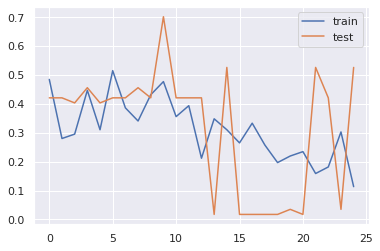

In [ ]:
adam=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")
# define model
model = Sequential()
model.add(Dense(500, input_dim=13, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.4))
model.add(Dense(200, activation='relu',kernel_regularizer='l1'))
model.add(Dense(100, activation='relu',kernel_regularizer='l1'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

# fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.636, Test: 0.526


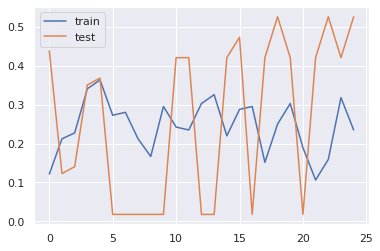

In [ ]:
adam=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")
# define model
model = Sequential()
model.add(Dense(500, input_dim=13, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.4))
model.add(Dense(200, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu',kernel_regularizer='l1'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

# fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In next model Regularization:Dropout, Early stopping is added


Epoch 00001: val_accuracy improved from -inf to 0.21053, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.21053 to 0.36842, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.36842

Epoch 00004: val_accuracy did not improve from 0.36842

Epoch 00005: val_accuracy did not improve from 0.36842

Epoch 00006: val_accuracy did not improve from 0.36842

Epoch 00007: val_accuracy did not improve from 0.36842

Epoch 00008: val_accuracy did not improve from 0.36842

Epoch 00009: val_accuracy did not improve from 0.36842

Epoch 00010: val_accuracy improved from 0.36842 to 0.42105, saving model to best_model.h5

Epoch 00011: val_accuracy improved from 0.42105 to 0.52632, saving model to best_model.h5

Epoch 00012: val_accuracy improved from 0.52632 to 0.64912, saving model to best_model.h5

Epoch 00013: val_accuracy did not improve from 0.64912

Epoch 00014: val_accuracy did not improve from 0.64912

Epoch 00015: val_accuracy did not improve f

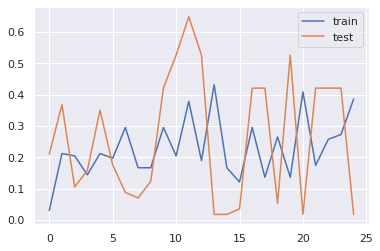

In [ ]:
adam=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")
# define model
model = Sequential()
model.add(Dense(500, input_dim=13, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.4))
model.add(Dense(200, activation='relu',kernel_regularizer='l1'))
model.add(Dense(100, activation='relu',kernel_regularizer='l1'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Dropout, Early stopping and batch normalization are added 


Epoch 00001: val_accuracy improved from -inf to 0.29825, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.29825 to 0.38596, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.38596 to 0.40351, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.40351 to 0.52632, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.52632 to 0.59649, saving model to best_model.h5

Epoch 00006: val_accuracy improved from 0.59649 to 0.61404, saving model to best_model.h5

Epoch 00007: val_accuracy did not improve from 0.61404

Epoch 00008: val_accuracy did not improve from 0.61404

Epoch 00009: val_accuracy did not improve from 0.61404

Epoch 00010: val_accuracy did not improve from 0.61404

Epoch 00011: val_accuracy did not improve from 0.61404

Epoch 00012: val_accuracy did not improve from 0.61404

Epoch 00013: val_accuracy did not improve from 0.61404

Epoch 00014: val_accuracy did not improve from 0.61404

Epoch 00

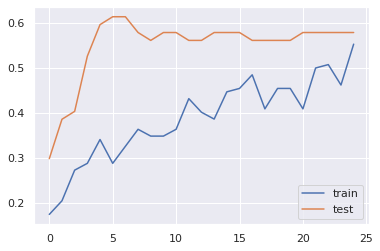

In [ ]:
adam=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

# define model
model = Sequential()
model.add(Dense(500, input_dim=13, activation='relu',kernel_regularizer='l2'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Now optimizer is changed to Adagrad


Epoch 00001: val_accuracy improved from -inf to 0.31579, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.31579 to 0.33333, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.33333 to 0.35088, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.35088 to 0.38596, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.38596 to 0.52632, saving model to best_model.h5

Epoch 00006: val_accuracy did not improve from 0.52632

Epoch 00007: val_accuracy did not improve from 0.52632

Epoch 00008: val_accuracy did not improve from 0.52632

Epoch 00009: val_accuracy improved from 0.52632 to 0.57895, saving model to best_model.h5

Epoch 00010: val_accuracy did not improve from 0.57895

Epoch 00011: val_accuracy did not improve from 0.57895

Epoch 00012: val_accuracy did not improve from 0.57895

Epoch 00013: val_accuracy improved from 0.57895 to 0.61404, saving model to best_model.h5

Epoch 00014: val_accuracy did

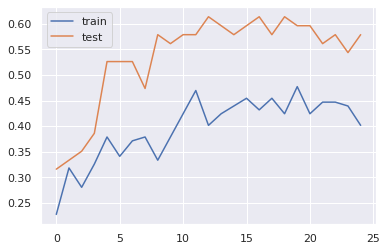

In [ ]:
tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad",
)
# define model
model = Sequential()
model.add(Dense(500, input_dim=13, activation='relu',kernel_regularizer='l2'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= adagrad, metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Model with only Batch Normalization


Epoch 00001: val_accuracy improved from -inf to 0.42105, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.42105 to 0.43860, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.43860 to 0.47368, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.47368 to 0.49123, saving model to best_model.h5

Epoch 00005: val_accuracy did not improve from 0.49123

Epoch 00006: val_accuracy did not improve from 0.49123

Epoch 00007: val_accuracy did not improve from 0.49123

Epoch 00008: val_accuracy did not improve from 0.49123

Epoch 00009: val_accuracy did not improve from 0.49123

Epoch 00010: val_accuracy did not improve from 0.49123

Epoch 00011: val_accuracy did not improve from 0.49123

Epoch 00012: val_accuracy did not improve from 0.49123

Epoch 00013: val_accuracy did not improve from 0.49123

Epoch 00014: val_accuracy improved from 0.49123 to 0.54386, saving model to best_model.h5

Epoch 00015: val_accuracy improved from 0.5

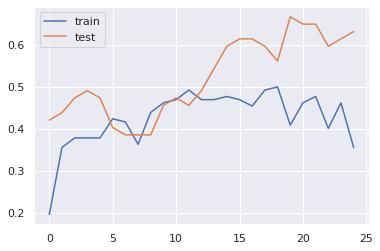

In [ ]:
adam=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

# define model
model = Sequential()
model.add(Dense(500, input_dim=13, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

**Building a Hypermodel**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=500,
                                            max_value=600,
                                            step=10)))
        model.add(layers.Dense(units=hp.Int('units2_' + str(i),
                                            min_value=200,
                                            max_value=300,
                                            step=10),
                               activation='relu'))
        model.add(layers.BatchNormalization()) 
    model.add(layers.Dropout(rate=hp.Float('rate_',
                                            min_value=0.1,
                                            max_value=0.8,
                                            step=0.1)))      
    
    for i in range(hp.Int('num_layers2', 2, 3)):
        model.add(layers.Dense(units=hp.Int('units3_' + str(i),
                                            min_value=100,
                                            max_value=150,
                                            step=10),
                               activation='relu'))
        model.add(layers.BatchNormalization())
    model.add(layers.Dense(7, activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=3,
    directory='my_dir',
    project_name='HaHa'
   )

tuner.search_space_summary()

Search space summary
Default search space size: 10
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 500, 'max_value': 600, 'step': 10, 'sampling': None}
units2_0 (Int)
{'default': None, 'conditions': [], 'min_value': 200, 'max_value': 300, 'step': 10, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 500, 'max_value': 600, 'step': 10, 'sampling': None}
units2_1 (Int)
{'default': None, 'conditions': [], 'min_value': 200, 'max_value': 300, 'step': 10, 'sampling': None}
rate_ (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.8, 'step': 0.1, 'sampling': None}
num_layers2 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 3, 'step': 1, 'sampling': None}
units3_0 (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 150, 'step': 10, 'sampling': None}
units3_1 (Int)
{'defa

In [ ]:
tuner.search(x_train, y_train,
             epochs=5,
             validation_data=(x_test, y_test))

Trial 20 Complete [00h 00m 07s]
val_accuracy: 0.22807017465432486

Best val_accuracy So Far: 0.5263157884279887
Total elapsed time: 00h 03m 01s
INFO:tensorflow:Oracle triggered exit


In [ ]:
models = tuner.get_best_models(num_models=3)

In [ ]:
models[0].evaluate(x_train, y_train)

5/5 [==============================] - 2s 4ms/step - loss: 129.1439 - accuracy: 0.6781


[121.75955963134766, 0.6515151262283325]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model1(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=500,
                                            max_value=600,
                                            step=10)))
        model.add(layers.Dense(units=hp.Int('units2_' + str(i),
                                            min_value=200,
                                            max_value=300,
                                            step=10),
                               activation='relu'))
        model.add(layers.BatchNormalization()) 
    model.add(layers.Dropout(rate=hp.Float('rate_',
                                            min_value=0.1,
                                            max_value=0.8,
                                            step=0.1)))      
    
    for i in range(hp.Int('num_layers2', 2, 3)):
        model.add(layers.Dense(units=hp.Int('units3_' + str(i),
                                            min_value=100,
                                            max_value=150,
                                            step=10),
                               activation='relu'))
        model.add(layers.BatchNormalization())
    model.add(layers.Dense(7, activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

tuner_bo = BayesianOptimization(
            build_model1,
            objective='val_accuracy',
            max_trials=20,
            seed=42,
            executions_per_trial=2,
            overwrite=True
        )

tuner_bo.search_space_summary()

Search space summary
Default search space size: 10
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 500, 'max_value': 600, 'step': 10, 'sampling': None}
units2_0 (Int)
{'default': None, 'conditions': [], 'min_value': 200, 'max_value': 300, 'step': 10, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 500, 'max_value': 600, 'step': 10, 'sampling': None}
units2_1 (Int)
{'default': None, 'conditions': [], 'min_value': 200, 'max_value': 300, 'step': 10, 'sampling': None}
rate_ (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.8, 'step': 0.1, 'sampling': None}
num_layers2 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 3, 'step': 1, 'sampling': None}
units3_0 (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 150, 'step': 10, 'sampling': None}
units3_1 (Int)
{'defa

In [ ]:
tuner_bo.search(x_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Trial 20 Complete [00h 00m 15s]
val_accuracy: 0.24074073880910873

Best val_accuracy So Far: 0.7037037014961243
Total elapsed time: 00h 06m 00s
INFO:tensorflow:Oracle triggered exit


In [ ]:
models = tuner_bo.get_best_models(num_models=3)

In [ ]:
models[0].evaluate(x_train, y_train)

5/5 [==============================] - 1s 4ms/step - loss: 2776.1741 - accuracy: 0.6823


[2677.12451171875, 0.6666666865348816]

In [ ]:
models[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600)               8400      
_________________________________________________________________
dense_1 (Dense)              (None, 300)               180300    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               150500    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               150300    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               1

This is the best model among all the models.